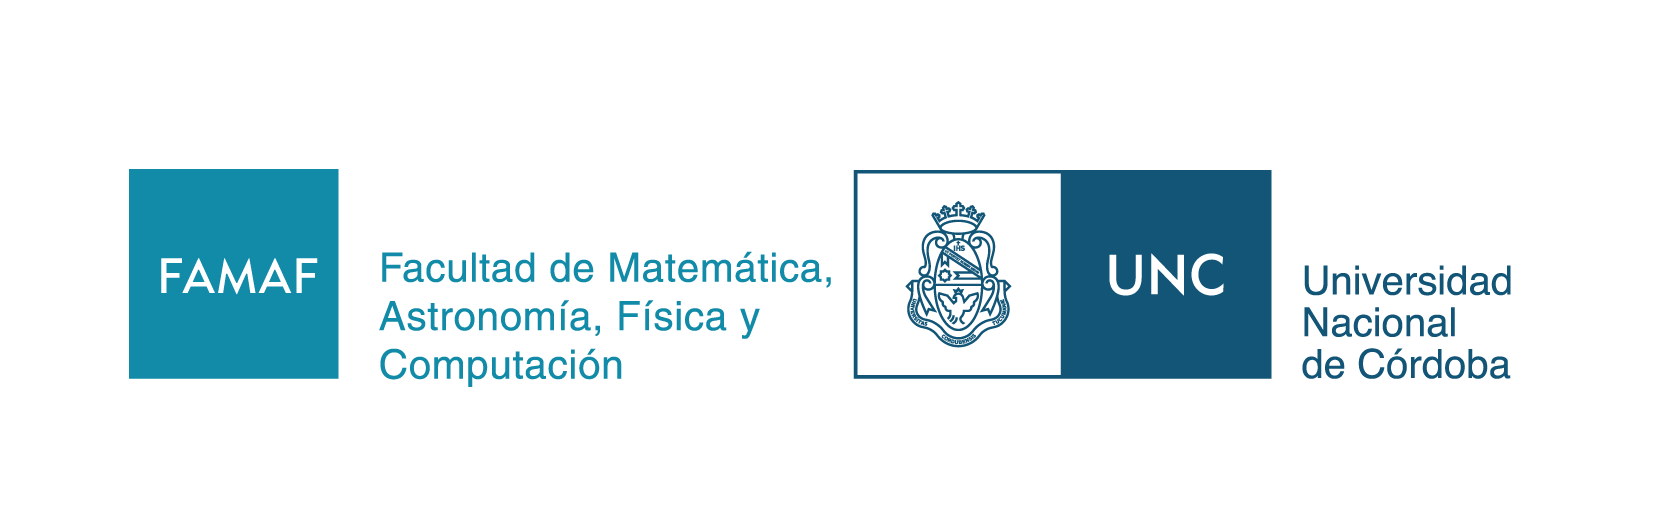
#Optativa Series de Tiempo



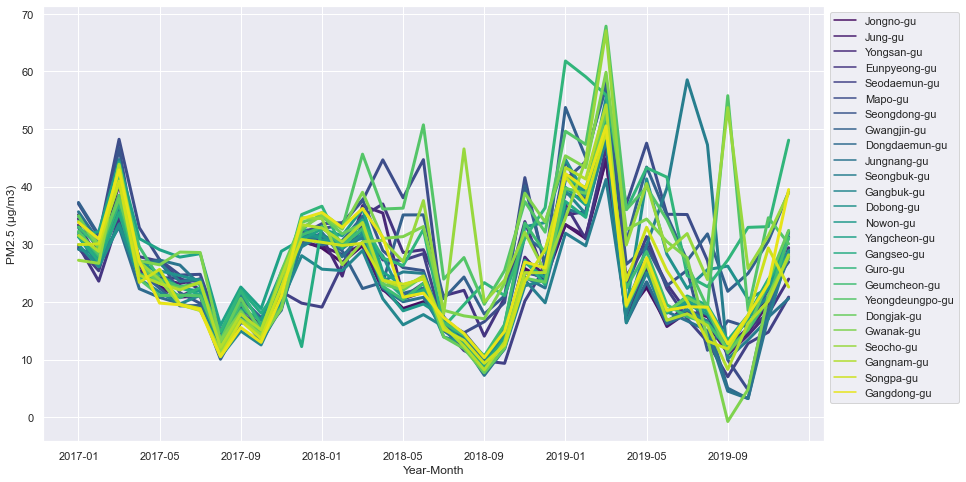

#Exploración de datos de polucion con Folium

# Propósito


Este conjunto de datos mide la cantidad de contaminantes atmosféricos (SO2, NO2, CO, O3, PM10 y PM2.5) cada hora a través de equipos de contaminación atmosférica en Seúl, Corea.
En este ejercicio, se usa Folium para visualizar dónde se encuentran los equipos de medición de contaminación del aire en Seúl. También se visualizará la cantidad de contaminante atmosférico medido en un momento determinado en cada equipo.

# Folium

Qué es Folium?

Folium es una poderosa biblioteca de Python que ayuda a crear varios tipos de mapas. El hecho de que los resultados de Folium sean interactivos hace que esta biblioteca sea muy útil para la construcción de tableros de trabajo.
  
Folium fue desarrollado con el único propósito de visualizar datos geoespaciales.

[1]: https://www.kaggle.com/mrushan3/data-visualization-with-folium-library/comments#722403

# import library

In [ ]:
import pandas as pd
import random

# for visualization
import folium
import json

# Carga de datos


Como se puede ver en la descripción del conjunto de datos, se proporcionan cuatro archivos.

- `Measure_summary.csv` con un resumen de la información
- `Measurement_info.csv` con información sobre los contaminantes
- `Measurement_item_info.csv` con información sobre la estación de medición
- `Measurement_station_info.csv` con información sobre la estación de medición

In [ ]:
# load data
df = pd.read_csv('/content/Measurement_summary.csv')
df_item = pd.read_csv('/content/Measurement_item_info.csv')
df_station = pd.read_csv('/content/Measurement_station_info.csv')

# Visualización



## Compruebamos la ubicación de la estación de medición
Seúl se divide en 25 gu(distritos). Para visualizar Seúl dividiéndola en diferentes distritos, necesitamos un archivo json que contenga información sobre distritos.  
  
Usando las variables `Latitud` y la `Longitud` almacenadas en `Measurement_station_info.csv`, se posiciona un marcador en la ubicación de la estación de vigilancia.

[1]: https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json


In [ ]:
center = [37.541, 126.986] # center of Seoul
m = folium.Map(location=center, zoom_start=11) # set map

# load district information
with open('/content/seoul_municipalities_geo_simple.json',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()

# Add geojson to folium
folium.GeoJson(
    geo,
    name='seoul_municipalities'
).add_to(m)

# Add marker
for i in df_station.index[:25]:
    popup_str = 'Station ' + str(df_station.loc[i, 'Station code'])
    folium.Marker(df_station.loc[i, ['Latitude', 'Longitude']].values.tolist(), # Corrected: use .values.tolist()
                  popup=popup_str,
                  icon=folium.Icon(color='black')).add_to(m)

m # print

Como se puede ver en el mapa de arriba, Seúl está dividido en 25 distritos.  
La ubicación de los marcadores también muestra que en cada distrito se encuentra una estación de medición.



 ## Marcadores según el estado de la polución

`Measurement_item_info.csv` nos dice cuál es el estado actual de la polución basado en el valor del elemento medido.
- bueno (azul)
- normal (verde)
- malo (amarillo)
- muy malo (Red)  

Utilizaremos estos valores para visualizar el estado de diferentes regiones por diferentes colores de marcadores.  



In [ ]:
def get_criteria(df_item, item):
    criteria = df_item[df_item['Item name'] == item].iloc[0, 3:]
    return criteria

def seoulmap(df_day, df_item, item):
    criteria = get_criteria(df_item, item)

    dfm = df_day.copy()

    # set color of marker
    dfm['color'] = ''
    dfm.loc[dfm[item] <= criteria.iloc[3], 'color'] = 'red' # Use .iloc
    dfm.loc[dfm[item] <= criteria.iloc[2], 'color'] = 'orange' # yellow # Use .iloc
    dfm.loc[dfm[item] <= criteria.iloc[1], 'color'] = 'green' # Use .iloc
    dfm.loc[dfm[item] <= criteria.iloc[0], 'color'] = 'blue' # Use .iloc

    center = [37.541, 126.986] # center of Seoul
    m = folium.Map(location=center, zoom_start=11) # set map

    with open('/content/seoul_municipalities_geo_simple.json',mode='rt',encoding='utf-8') as f:
        geo = json.loads(f.read())
        f.close()

    folium.GeoJson(
        geo,
        name='seoul_municipalities'
    ).add_to(m)

    for i in dfm.index:
        popup_str = 'Station ' + str(dfm.loc[i, 'Station code']) + ': ' + str(dfm.loc[i, item])
        folium.Marker(dfm.loc[i, ['Latitude', 'Longitude']].values.tolist(),
                      popup=popup_str,
                      icon=folium.Icon(color=dfm.loc[i, 'color'])).add_to(m)

    return m

In [ ]:
random.seed(0)
ind = random.randint(1, len(df))

day = df.loc[ind, 'Measurement date']
print(day)
df_day = df[df['Measurement date'] == day]

seoulmap(df_day, df_item, 'PM10')

2018-10-07 05:00


In [ ]:
seoulmap(df_day, df_item, 'PM2.5')

In [ ]:
random.seed(1)
ind = random.randint(1, len(df))

day = df.loc[ind, 'Measurement date']
print(day)
df_day = df[df['Measurement date'] == day]



2018-04-20 16:00


In [ ]:
seoulmap(df_day, df_item, 'PM10')

In [ ]:
seoulmap(df_day, df_item, 'PM2.5')# SO2, NO2, CO, O3, PM10, PM2.5